In [ ]:
# 연관분석
# 만약 X를 선호 9구매)했다면 Y도 선호 (구매)할 것이다.  -->연관관계를 도출하는 것이 목적


In [ ]:
"""
1.  지지도
frequency 기준으로 추천!  freq(x) / N 
전체대비 얼마나 많이~

2. 신뢰도
confidence(x-->y) = freq(x,y) / freq(x)
x를 구매한 사람중에 y도 좋아할 확률!
신뢰도를 기반으로 추천하면... Y는 모든 사람이 봤기 대문에 freq(x,y)는 너무 높게 나왔을 듯..
신뢰도만을 기반으로 추천하기 힘듬.
그래서 리프트 추가

3. lift
lift(x-->y) = confidence(x-->Y) / support(Y)
"이거 봤다는 사실이 얼마나 영향을 주는지-->숫자로 표현한 것이 LIFT"
가장 lift가 높은 것을 모아서 CHAINING 방식으로 .. 나열. 가장 높은 것끼지 연결시켜서 보여줌


연관분석의 단위: 장바구니
하나의 transaction...간의 관계를 파악하는데..

freq(x), freq(y), freq(x,y)를 알아야 연관분석을 할 수 있다.


***모든 연관관계를 파악할 수 없기 때문에.. "자주 등장한" 연관 관계만을 파악하자.
너무 적게 등장하면 해당 아이템 집합을 포함한 모든 집합은 카운트하지 않음

APRIORI ALGORITHM ----> 빈발집합 도출 

"""

In [ ]:
"""
***협업 필터링 ****

만약 두 명의 사용자가 유사한 관심사를 가지고 있다면 -->그들은 미래에도 유사한 취향을 가질 것이다.

*상호작용 데이터*는 알 수 있기 떄문에 고객이 주로 어떤 취햐을 가질지 추론가능!
CF 알고리즘은 노출된 데이터를 통해서 고객의 특성, 아이템의 특성을 어떻게 수치화할수 있는지 할 것! 
고객, 아이템을 묶을 수 있고.. 등등 

"유사도"가 중요
어떻게 계산할까?
-거리, 방향... 등을 기준으로 배울것!

ITEM BASED COLLABERATIVE FILTERING*

"""

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt

In [3]:
# 데이터를 다운받은 후, 로컬 컴퓨터에 저장합니다.
# 한번 다운받은 후에는 다운받은 데이터로 바로 불러오게 됩니다.
movie_path = get_file("movies.csv",
                      "https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/datasets/movies.csv")
movie_df = pd.read_csv(movie_path)

genre_path = get_file("genres.csv",
                      "https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/datasets/genres.csv")
genre_df = pd.read_csv(genre_path)

rating_path = get_file("ratings.csv",
                       "https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/datasets/ratings.csv")
rating_df = pd.read_csv(rating_path)

In [4]:
movie_df

,id,title,release_year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995
5,6,Heat,1995
6,7,Sabrina,1995
7,8,Tom and Huck,1995
8,9,Sudden Death,1995
9,10,GoldenEye,1995


In [9]:
display(movie_df.head())
display(genre_df.head())
display(rating_df.head())

,id,title,release_year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


,movie_id,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


,user_id,movie_id,rating,rated_at
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [32]:
# 위 영화'One Day'에 대한 정보 가져오기
oneday_movie_df = movie_df[movie_df.title == 'One Day']

# 'One Day' 영화에 대한 Genre 정보 가져오기
oneday_id = oneday_movie_df.id.iloc[0]
genre_df[genre_df.movie_id == oneday_id]

,movie_id,genre
36207,88179,Drama
36208,88179,Romance


In [29]:
oneday_genreset = genreset_per_movie[oneday_id]
print(oneday_genreset)

{'Romance', 'Drama'}


In [20]:
# 각 영화별로 장르를 집합으로 묶어주세요
genreset_per_movie = (
    genre_df   #장르별로 
    .groupby('movie_id')   # id 별로 묶어서... (기준)
     ['genre']  
    .apply(set)
    )
genreset_per_movie.head(5)

movie_id
1    {Animation, Comedy, Adventure, Fantasy, Children}
2                       {Fantasy, Children, Adventure}
3                                    {Romance, Comedy}
4                             {Romance, Drama, Comedy}
5                                             {Comedy}
Name: genre, dtype: object

In [31]:

genreset_per_movie[genreset_per_movie == oneday_genreset]

#print(same_genre_movie_ids.shape)
same_genre_movie_ids = (
    genreset_per_movie # 영화별 장르 집합에서
    [genreset_per_movie == oneday_genreset] # oneday 장르와 동일한 것에 대한
    .index # movie_id를 가져와 주세요
)

print(same_genre_movie_ids.shape)
same_genre_movie_ids

(1075,)


Int64Index([    17,     25,     28,     35,     46,     49,     74,     83,
                85,    105,
            ...
            128688, 129032, 129788, 129841, 129857, 129947, 130388, 130396,
            130746, 131162],
           dtype='int64', name='movie_id', length=1075)

In [33]:
movie_df[movie_df.id.isin(same_genre_movie_ids)].sample(5)

,id,title,release_year
2843,2929,Reds,1981
3019,3106,Come See the Paradise,1990
10365,36373,Comrades: Almost a Love Story (Tian mi mi),1996
3577,3668,Romeo and Juliet,1968
24312,115220,Grace of Monaco,2014


In [34]:
display(movie_df[movie_df.title == 'Eternal Sunshine of the Spotless Mind'])
genre_df[genre_df.movie_id==7361]

,id,title,release_year
7249,7361,Eternal Sunshine of the Spotless Mind,2004


,movie_id,genre
14445,7361,Drama
14446,7361,Romance
14447,7361,Sci-Fi


In [ ]:
"""
영화 데이터 가져옥; COLLABERATIVE FILTERING 
"""

In [35]:

target_movies = {
    8957: "Saw", 
    2232: "Cube", 
    6323: "Identity", 
    8638: "Before Sunset", 
    215: "Before Sunrise"}

In [36]:
# 위 영화들에 대한 정보 가져오기
target_movie_df = movie_df[movie_df.id.isin(target_movies)]
target_genre_df = genre_df[genre_df.movie_id.isin(target_movies)]

pd.merge(target_movie_df, target_genre_df, left_on='id', right_on='movie_id') 

,id,title,release_year,movie_id,genre
0,215,Before Sunrise,1995,215,Drama
1,215,Before Sunrise,1995,215,Romance
2,2232,Cube,1997,2232,Horror
3,2232,Cube,1997,2232,Mystery
4,2232,Cube,1997,2232,Sci-Fi
5,2232,Cube,1997,2232,Thriller
6,6323,Identity,2003,6323,Crime
7,6323,Identity,2003,6323,Horror
8,6323,Identity,2003,6323,Mystery
9,6323,Identity,2003,6323,Thriller


In [37]:

target_rating_df = rating_df[rating_df.movie_id.isin(target_movies)]

# rating_df의 movie_id를 
# 알아볼 수 있는 영화제목으로 변경
target_rating_df.loc[:,"title"] = target_rating_df.movie_id.map(target_movies)

target_rating_df.sample(5)

C:\Users\eugen\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\eugen\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,user_id,movie_id,rating,rated_at,title
17498247,121015,8957,5.0,1237225462,Saw
15835717,109534,215,5.0,1406290884,Before Sunrise
14822874,102388,215,4.0,1359300810,Before Sunrise
6251858,42956,2232,4.0,1141479952,Cube
268704,1849,6323,3.5,1138823636,Identity


In [44]:
ui_matrix=target_rating_df.pivot_table(values='rating', index='user_id', columns='movie_id')
ui_matrix.dropna(axis=0)

movie_id,215,2232,6323,8638,8957
user_id,,,,,
982,3.5,3.5,3.0,4.0,3.0
1165,4.5,4.0,2.5,4.0,2.5
1288,4.0,3.5,3.0,3.5,4.0
2650,4.0,3.0,4.0,4.0,4.5
2669,4.0,3.5,4.0,4.0,3.5
3676,4.0,3.5,4.5,4.0,4.0
3907,3.5,3.0,2.5,4.0,1.5
5725,4.0,4.0,3.0,4.5,4.0
6099,4.0,3.5,4.0,5.0,4.0


In [ ]:
"""

181의  case를 통해서 영화끼리의 유사도를 구할것!

"""

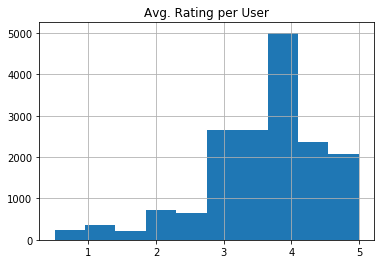

In [45]:
plt.title('Avg. Rating per User')
ui_matrix.mean(axis=1).hist()
plt.show()

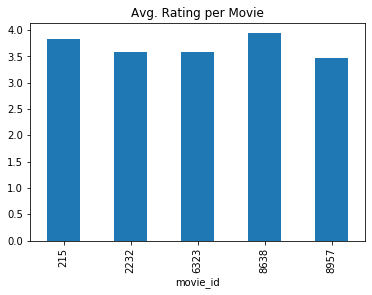

In [46]:
plt.title('Avg. Rating per Movie')
ui_matrix.mean(axis=0).plot(kind='bar')
plt.show()

In [ ]:

"""
각 유저의 평균 평점에서 전체 평균을 빼주면 각 유저의 편향을 알 수 있습니다.
마찬가지로 각 영화의 평균 평점에서 전체의 평균을 빼주면 영화의 편향을 계산할 수 있습니다.
""".

In [52]:

"""
편향
---> ui_matrix에서 유저의 편향과 영화의 편향을 빼면, 보정된 Matrix가 나옵니다.
"""
avg_rating = ui_matrix.mean().mean()
avg_rating

# 고객의 편향 계산하기
user_bias = ui_matrix.mean(axis=1) - avg_rating
user_bias

# 아이템의 편향 계산하기
item_bias = ui_matrix.mean(axis=0) - avg_rating
item_bias

movie_id
215     0.154918
2232   -0.091055
6323   -0.100387
8638    0.253524
8957   -0.217000
dtype: float64

In [55]:
"""
본래 ui_matrix 형태였던 데이터가 adjusted_ui_matrix로 바뀌었습니다.
"""
adjusted_ui_matrix = (
ui_matrix
    .sub(user_bias, axis=0)
    .sub(item_bias, axis=1)
    
)

"""
모델을 디자인 해높고 bias를 뺴야.. 성능이 좋다. (극단적인게 많기 때문예)
"""

'\n모델을 디자인 해높고 bias를 뺴야.. 성능이 좋다. (극단적인게 많기 때문예)\n'

In [56]:
adjusted_ui_matrix
#item을 기준으로 조금씩 보정된다***
#손질하는 시간..
#noise를 제거!!!!!!!!!!!

movie_id,215,2232,6323,8638,8957
user_id,,,,,
11,NaN,3.775049,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,3.900994
50,3.529076,NaN,NaN,3.430470,NaN
56,3.529076,NaN,NaN,NaN,NaN
58,NaN,NaN,3.784381,NaN,NaN
61,3.529076,NaN,NaN,NaN,NaN
65,NaN,3.775049,NaN,NaN,NaN
91,NaN,4.025049,3.534381,NaN,NaN
94,NaN,NaN,NaN,NaN,3.900994


In [60]:

display(ui_matrix.head())

display(adjusted_ui_matrix.head())


movie_id,215,2232,6323,8638,8957
user_id,,,,,
11,NaN,4.5,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,0.5
50,5.0,NaN,NaN,5.0,NaN
56,3.0,NaN,NaN,NaN,NaN
58,NaN,NaN,4.5,NaN,NaN


movie_id,215,2232,6323,8638,8957
user_id,,,,,
11,NaN,3.775049,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,3.900994
50,3.529076,NaN,NaN,3.43047,NaN
56,3.529076,NaN,NaN,NaN,NaN
58,NaN,NaN,3.784381,NaN,NaN


In [63]:
"""
보정 수식
"""

# 보정 수식

adjusted_ui_matrix = (
    ui_matrix
    .sub(user_bias, axis=0)
    .sub(item_bias, axis=1)
)
adjusted_ui_matrix.columns = adjusted_ui_matrix.columns.map(target_movies)
adjusted_ui_matrix


movie_id,Before Sunrise,Cube,Identity,Before Sunset,Saw
user_id,,,,,
11,NaN,3.775049,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,3.900994
50,3.529076,NaN,NaN,3.430470,NaN
56,3.529076,NaN,NaN,NaN,NaN
58,NaN,NaN,3.784381,NaN,NaN
61,3.529076,NaN,NaN,NaN,NaN
65,NaN,3.775049,NaN,NaN,NaN
91,NaN,4.025049,3.534381,NaN,NaN
94,NaN,NaN,NaN,NaN,3.900994


In [64]:

sample_cases = (
    adjusted_ui_matrix
    [["Before Sunrise","Saw"]]
    .dropna()
    .sample(n=5, random_state=2)
).copy()
sample_cases

movie_id,Before Sunrise,Saw
user_id,,
22602,3.529076,3.900994
39915,3.195743,4.567661
127390,3.154076,4.025994
125777,4.829076,1.700994
59477,2.829076,4.200994


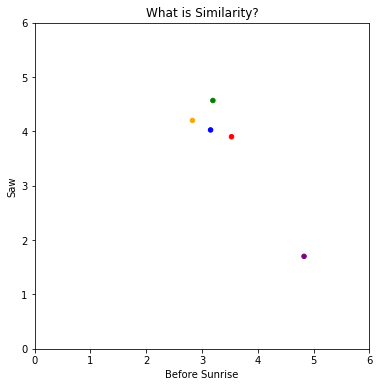

In [67]:
"""
앞서 만든 편향이 제거된 평점 데이터에 유사도 알고리즘을 적용하여 계산해본다면 어떻게 해야 할까요?

거리 및 방향성을 이용한 유사도는 2차원 그래프에 그려 시각화하면 이해하기 쉽습니다. 
2차원에 시각화하기 위해 예시로 Before Sunrise와 Saw 두 영화를 모두 본 사람에 한해서 무작위로 5명을 추출하였습니다.
"""

ax = sample_cases.plot(kind='scatter',
                  x='Before Sunrise',
                  y='Saw',
                  c=['red','green','blue','purple','orange'],
                  xlim=[0, 5.5],
                  ylim=[0, 5.5],
                  figsize=(6,6))

sample_cases.index = ['red','green','blue','purple','orange']
plt.title("What is Similarity?")
plt.xticks([0,1,2,3,4,5,6])
plt.yticks([0,1,2,3,4,5,6])
plt.show()



In [ ]:
"""
극명하게 나눠지는 구나... 
거리의 차이를 구하기 위해서... MANHATTAN 거리, 유클리드..등을 계산
"""

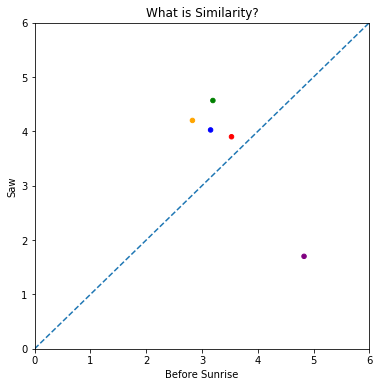

In [69]:
ax = sample_cases.plot(kind='scatter',
                  x='Before Sunrise',
                  y='Saw',
                  c=['red','green','blue','purple','orange'],
                  xlim=[0, 5.5],
                  ylim=[0, 5.5],
                  figsize=(6,6))

sample_cases.index = ['red','green','blue','purple','orange']
plt.plot([0,6],[0,6],'--')
plt.title("What is Similarity?")
plt.xticks([0,1,2,3,4,5,6])
plt.yticks([0,1,2,3,4,5,6])

plt.show()

In [ ]:
"""
거리를 활용한 유사도 계산
(스칼라: 크기,  벡터: 방향)

--->스칼라를 기준으로!!!!!!!!
"""

In [74]:
def l1_distance(x, y):
    return np.sum(np.abs(x-y))  

"""
######################################PROJECT에 사용하기. SUMMATION을 해서...수식을 표기\
많은 api에서 manhattan 공식을 재공해주긴 한다. 하지만 수식을 변환해서 작성해야하는 것이 중요.
"""

In [71]:
from itertools import combinations

In [75]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(), 2):
    dist = l1_distance(c1_df.values, c2_df.values)
    print(f"{c1_name:>6}과 {c2_name:>6}의 맨해튼 거리  : {dist:.3f}")
    
    """
    red와 green의 거리...등등
    모든 것 사이의 거리
    """

   red과  green의 맨해튼 거리  : 1.000
   red과   blue의 맨해튼 거리  : 0.500
   red과 purple의 맨해튼 거리  : 3.500
   red과 orange의 맨해튼 거리  : 1.000
 green과   blue의 맨해튼 거리  : 0.583
 green과 purple의 맨해튼 거리  : 4.500
 green과 orange의 맨해튼 거리  : 0.733
  blue과 purple의 맨해튼 거리  : 4.000
  blue과 orange의 맨해튼 거리  : 0.500
purple과 orange의 맨해튼 거리  : 4.500


In [77]:
"""
거리를 사용하여 유사도를 구해보겠습니다.
"""

for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    dist = l1_distance(c1_df.values, c2_df.values)
    sim = 1/(1+dist)    
    print(f"{c1_name:>6}과 {c2_name:>6}의 맨해튼 유사도 : {sim:.3f}")

   red과  green의 맨해튼 유사도 : 0.500
   red과   blue의 맨해튼 유사도 : 0.667
   red과 purple의 맨해튼 유사도 : 0.222
   red과 orange의 맨해튼 유사도 : 0.500
 green과   blue의 맨해튼 유사도 : 0.632
 green과 purple의 맨해튼 유사도 : 0.182
 green과 orange의 맨해튼 유사도 : 0.577
  blue과 purple의 맨해튼 유사도 : 0.200
  blue과 orange의 맨해튼 유사도 : 0.667
purple과 orange의 맨해튼 유사도 : 0.182


In [ ]:
"""
###################### 유클리디안 거리 (직선거리로 바로 하자)
"""

In [78]:
def l2_distance(x, y):
    return np.sum( ( x-y)**2)

In [79]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    dist = l2_distance(c1_df.values, c2_df.values)
    sim = 1/(1+dist)
    print(f"{c1_name:>6}과 {c2_name:>6}의 유클리드 거리  : {dist:.3f}")

   red과  green의 유클리드 거리  : 0.556
   red과   blue의 유클리드 거리  : 0.156
   red과 purple의 유클리드 거리  : 6.530
   red과 orange의 유클리드 거리  : 0.580
 green과   blue의 유클리드 거리  : 0.295
 green과 purple의 유클리드 거리  : 10.886
 green과 orange의 유클리드 거리  : 0.269
  blue과 purple의 유클리드 거리  : 8.211
  blue과 orange의 유클리드 거리  : 0.136
purple과 orange의 유클리드 거리  : 10.250


In [80]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    dist = l2_distance(c1_df.values, c2_df.values)
    sim = 1/(1+dist)
    print(f"{c1_name:>6}과 {c2_name:>6}의 유클리드 유사도 : {sim:.3f}")
"""
유클리디안은 차원문제 때문에..(제품이 많으면... 맨해튼이 낳음..) 조금 이상한 값이 나오기도 함...
유클리디안은 조금 더 정확한 추천을 할 떄 사용된다.
"""

   red과  green의 유클리드 유사도 : 0.643
   red과   blue의 유클리드 유사도 : 0.865
   red과 purple의 유클리드 유사도 : 0.133
   red과 orange의 유클리드 유사도 : 0.633
 green과   blue의 유클리드 유사도 : 0.772
 green과 purple의 유클리드 유사도 : 0.084
 green과 orange의 유클리드 유사도 : 0.788
  blue과 purple의 유클리드 유사도 : 0.109
  blue과 orange의 유클리드 유사도 : 0.880
purple과 orange의 유클리드 유사도 : 0.089


In [ ]:
"""
################################### 방향성을 이용한 유사도 계산  (각도를 따짐!!!!!!!!!)
"""

In [81]:
def cosine_similarity(x, y):
    num = np.sum(x * y)
    denum = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2))
    return num / ( denum + 1e-8 )

In [82]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    sim = cosine_similarity(c1_df.values, c2_df.values)
    print(f"{c1_name:>6}과 {c2_name:>6}의 유사도 : {sim:.3f}")

   red과  green의 유사도 : 0.992
   red과   blue의 유사도 : 0.997
   red과 purple의 유사도 : 0.879
   red과 orange의 유사도 : 0.990
 green과   blue의 유사도 : 0.999
 green과 purple의 유사도 : 0.813
 green과 orange의 유사도 : 1.000
  blue과 purple의 유사도 : 0.843
  blue과 orange의 유사도 : 0.997
purple과 orange의 유사도 : 0.802


In [83]:

sample_cases

movie_id,Before Sunrise,Saw
red,3.529076,3.900994
green,3.195743,4.567661
blue,3.154076,4.025994
purple,4.829076,1.700994
orange,2.829076,4.200994


In [ ]:
"""
################################ 피어슨 상관계수
+1 : 완벽한 양의 상관 관계
0 : 상관 관계가 전혀 없음
-1 : 완벽한 음의 상관 관계
"""

In [86]:
def pearson_coefficient(x, y):
    num = np.sum( (x - x.mean()) * (y - y.mean()) )
    denom = np.sqrt(np.sum((x - x.mean())**2)) * np.sqrt(np.sum((y - y.mean())**2))
    return num / (denom + 1e-8)

In [87]:
for (c1_name, c1_df), (c2_name, c2_df) in combinations(sample_cases.iterrows(),2):
    sim = pearson_coefficient(c1_df.values, c2_df.values)
    print(f"{c1_name:>6}과 {c2_name:>6}의 유사도 : {sim:.3f}")

   red과  green의 유사도 : 1.000
   red과   blue의 유사도 : 1.000
   red과 purple의 유사도 : -1.000
   red과 orange의 유사도 : 1.000
 green과   blue의 유사도 : 1.000
 green과 purple의 유사도 : -1.000
 green과 orange의 유사도 : 1.000
  blue과 purple의 유사도 : -1.000
  blue과 orange의 유사도 : 1.000
purple과 orange의 유사도 : -1.000


In [ ]:
"""
거리를 기반으로 한 게산 방법. (맨해튼, 유클리디안)
방향 ""   (코사인)

"""